In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
pulse_length = 240e-9
sample_rate = 2.4e9
avg_clifford = 1.875
cf_avg_samples = int(round(pulse_length*sample_rate*avg_clifford))

In [ ]:
def avg(data,n,k):
    return np.sum(data.reshape((n,k)),axis=1)/k

In [ ]:
n,k = np.loadtxt('params.txt',dtype=int)
compile_time_csv = np.loadtxt('compile_time_csv.txt')
compile_time_placeholder = np.loadtxt('compile_time_placeholder.txt')
upload_time_csv = np.loadtxt('upload_time_csv.txt')
upload_time_placeholder = np.loadtxt('upload_time_placeholder.txt')

rb = np.arange(1,n+1)

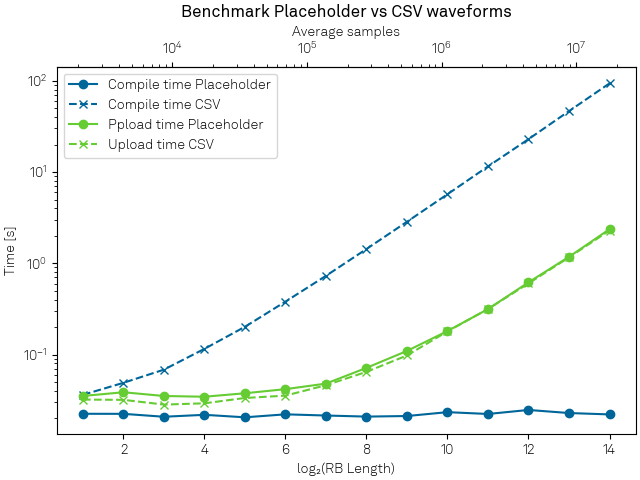

In [ ]:
fig,ax = plt.subplots(constrained_layout=True)
ax.set_yscale('log')

ax.plot(rb, avg(compile_time_placeholder,n,k), color='#006699', ls='-', marker='o', label='Compile time Placeholder')
ax.plot(rb, avg(compile_time_csv,n,k), color='#006699', ls='--', marker='x', label='Compile time CSV')
ax.plot(rb, avg(upload_time_placeholder,n,k), color='#66CC33', ls='-', marker='o', label='Ppload time Placeholder')
ax.plot(rb, avg(upload_time_csv,n,k), color='#66CC33', ls='--', marker='x', label='Upload time CSV')

rb2samples = lambda rb: 2**rb*cf_avg_samples
samples2rb = lambda samples: np.log2(samples/cf_avg_samples)

secax_x = ax.secondary_xaxis('top', functions=(rb2samples, samples2rb))
secax_x.set_xlabel('Average samples')
secax_x.set_xscale('log')


plt.xlabel("log₂(RB Length)")
plt.ylabel("Time [s]")

plt.title('Benchmark Placeholder vs CSV waveforms')

plt.legend()
plt.show()

In [ ]:
compile_time_el_new = np.loadtxt('compile_time_el_22_02_29711.txt')
upload_time_el_new = np.loadtxt('upload_time_el_22_02_29711.txt')
compile_time_el_old = np.loadtxt('compile_time_el_22_02_26577.txt')
upload_time_el_old = np.loadtxt('upload_time_el_22_02_26577.txt')

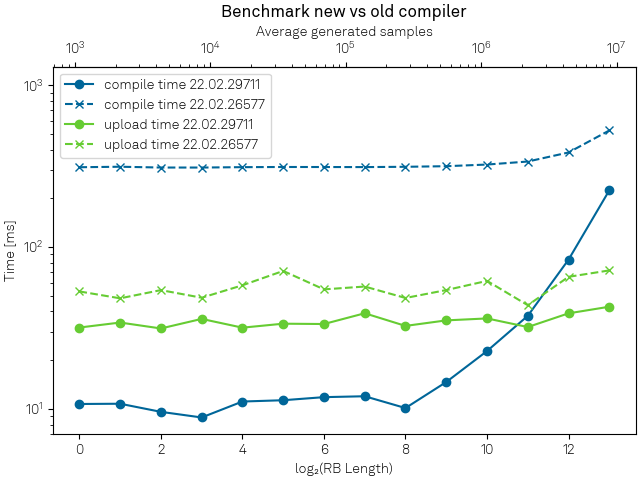

In [ ]:
fig,ax = plt.subplots(constrained_layout=True)
ax.set_yscale('log')

ax.plot(avg(compile_time_el_new,n,k)*1000, color='#006699', ls='-', marker='o', label='compile time 22.02.29711')
ax.plot(avg(compile_time_el_old,n,k)*1000, color='#006699', ls='--', marker='x', label='compile time 22.02.26577')
ax.plot(avg(upload_time_el_new,n,k)*1000, color='#66CC33', ls='-', marker='o', label='upload time 22.02.29711')
ax.plot(avg(upload_time_el_old,n,k)*1000, color='#66CC33', ls='--', marker='x', label='upload time 22.02.26577')

ax.set_ylim((7,1300))

rb2samples = lambda rb: 2**rb*cf_avg_samples
samples2rb = lambda samples: np.log2(samples/cf_avg_samples)

secax_x = ax.secondary_xaxis('top', functions=(rb2samples, samples2rb))
secax_x.set_xlabel('Average generated samples')
secax_x.set_xscale('log')


plt.xlabel("log₂(RB Length)")
plt.ylabel("Time [ms]")

plt.title('Benchmark new vs old compiler')

plt.legend(loc='upper left')
plt.show()